In [1]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mri_sample = pd.read_csv("mri_sample_stats.tsv", sep="\t", index_col=0)
copes = pd.read_csv("FSL_task/cope.tsv", sep="\t", index_col=0)
hrv = pd.read_csv("mri_sample_hrv.tsv", sep="\t", index_col=0)
mri_sample = pd.concat([mri_sample, hrv, copes], axis=1)

In [55]:
mri_sample.columns

Index(['age', 'sex', 'group', 'mean_fd', 'HeartAcc', 'NoteAcc', 'HeartAware',
       'NoteAware', 'HeartSensib', 'NoteSensib', 'HeartAccmNoteAcc',
       'HeartAwaremNoteAware', 'HeartSenmNoteSensibility',
       'Heart_AccmSensibility', 'Heart_AccmAwareness',
       'Heart_AwaremSensibility', 'MRatio', 'MmetaD', 'AnomBodyExpFreq',
       'AnomBodyExpDur', 'AnomBodyExpTot', 'EmoNumFreq', 'EmoNumDur',
       'EmoNumTot', 'AnomSubRecFreq', 'AnomSubRecDur', 'AnomSubRecTot',
       'AlienSurroundFreq', 'AlienSurroundDur', 'AlienSurroundTot', 'TotFreq',
       'MeanFreq', 'TotDuration', 'MeanDuration', 'GrandTotTrait', 'CDS_State',
       'Pannss_Positive', 'Panss_Cognitive', 'Panss_Negative', 'AccTot',
       'AwareTot', 'ConfidenceTot', 'Heart_HR', 'Heart_FAR', 'Note_HR',
       'Note_FAR', 'Heart_d', 'Heart_c', 'Note_d', 'Note_c', 'MeanRR',
       'MeanBPM', 'MedianRR', 'MedianBPM', 'MinRR', 'MinBPM', 'MaxRR',
       'MaxBPM', 'SDNN', 'RMSSD', 'nn50', 'pnn50', 'vlf_peak', 'vlf_power',
  

In [3]:
for var in hrv.columns:
    m = mri_sample[var].mean()
    median = mri_sample[var].median()
    sd = mri_sample[var].std()
    out = abs((mri_sample[var] - m) / sd) > 2.5
    mri_sample[var][out] = median

/home/hw1012/projects/critchley_depersonalisation/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
mod = smf.ols(formula='task_left_insular ~ RMSSD', data=mri_sample)
res = mod.fit()
print(res.summary())
mod = smf.ols(formula='task_right_insular ~ RMSSD', data=mri_sample)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      task_left_insular   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.936
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.137
Time:                        14:58:49   Log-Likelihood:                -47.707
No. Observations:                  49   AIC:                             103.4
Df Residuals:                      45   BIC:                             111.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [5]:
mod = smf.ols(formula='task_left_insular ~ lf_power + hf_power', data=mri_sample)
res = mod.fit()
print(res.summary())
mod = smf.ols(formula='task_right_insular ~ lf_power + hf_power', data=mri_sample)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      task_left_insular   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.433
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.249
Time:                        11:37:23   Log-Likelihood:                -49.201
No. Observations:                  49   AIC:                             104.4
Df Residuals:                      46   BIC:                             110.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3557      0.166      2.147      0.0

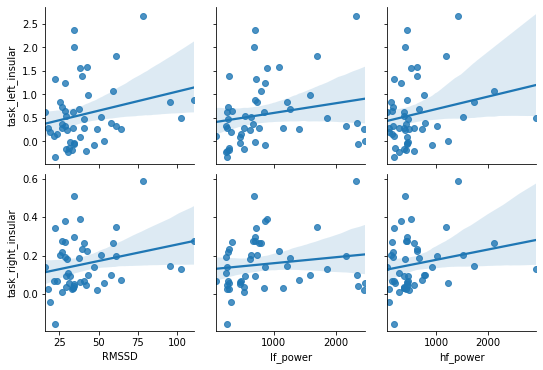

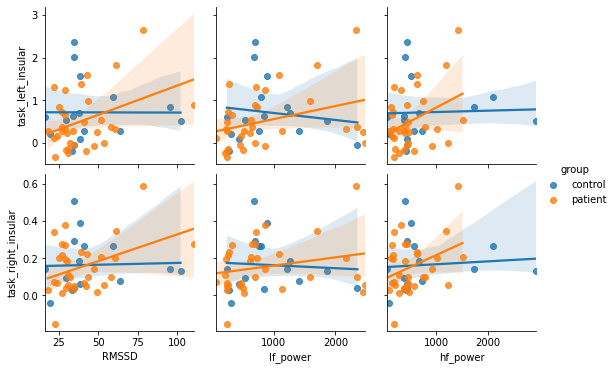

In [6]:
sns.pairplot(mri_sample, 
             x_vars=["RMSSD", "lf_power", "hf_power", ],
             y_vars=["task_left_insular", "task_right_insular"],
             kind="reg")
sns.pairplot(mri_sample, 
             x_vars=["RMSSD", "lf_power", "hf_power", ],
             y_vars=["task_left_insular", "task_right_insular"],
             hue="group",
             kind="reg")

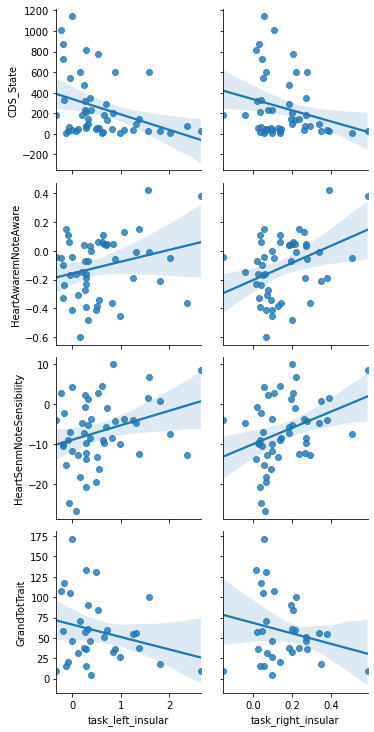

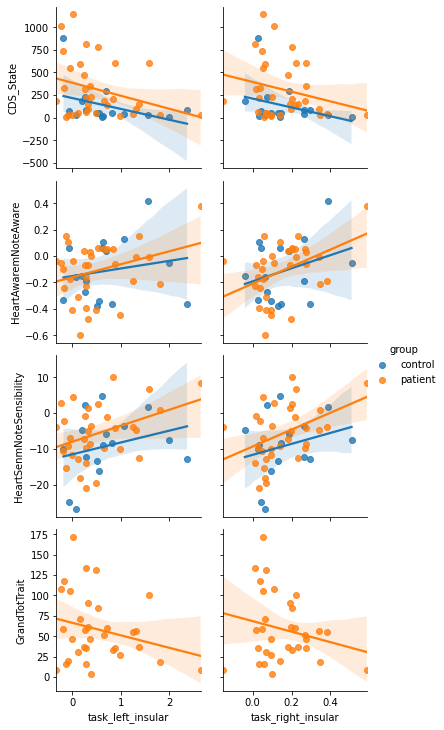

In [13]:
sns.pairplot(mri_sample, 
             x_vars=["task_left_insular", "task_right_insular"],
             y_vars=["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility", "GrandTotTrait"],
             kind="reg")
sns.pairplot(mri_sample, 
             x_vars=["task_left_insular", "task_right_insular"],
             y_vars=["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility", "GrandTotTrait"],
             hue="group",
             kind="reg")

In [14]:
for var in ["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility"]:
    mod = smf.ols(formula=f'{var} ~ task_left_insular', data=mri_sample)
    res = mod.fit()
    print(res.summary())
    mod = smf.ols(formula=f'{var} ~ task_right_insular', data=mri_sample)
    res = mod.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CDS_State   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.457
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0144
Time:                        12:09:41   Log-Likelihood:                -344.80
No. Observations:                  49   AIC:                             693.6
Df Residuals:                      47   BIC:                             697.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           339.2892     52.70

In [15]:
for var in ["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility"]:
    mod = smf.ols(formula=f'{var} ~ task_left_insular + RMSSD', data=mri_sample)
    res = mod.fit()
    print(res.summary())
    mod = smf.ols(formula=f'{var} ~ task_right_insular + RMSSD', data=mri_sample)
    res = mod.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CDS_State   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.478
Date:                Fri, 24 Apr 2020   Prob (F-statistic):             0.0392
Time:                        12:10:07   Log-Likelihood:                -344.50
No. Observations:                  49   AIC:                             695.0
Df Residuals:                      46   BIC:                             700.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           283.4038     91.54

In [16]:
for var in ["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility"]:
    mod = smf.ols(formula=f'{var} ~ task_left_insular + lf_power + hf_power', data=mri_sample)
    res = mod.fit()
    print(res.summary())
    mod = smf.ols(formula=f'{var} ~ task_right_insular + lf_power + hf_power', data=mri_sample)
    res = mod.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CDS_State   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.098
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.114
Time:                        12:10:21   Log-Likelihood:                -344.74
No. Observations:                  49   AIC:                             697.5
Df Residuals:                      45   BIC:                             705.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           324.5585     73.13

In [5]:
for var in ["CDS_State", "HeartAwaremNoteAware", "HeartSenmNoteSensibility"]:
    mod = smf.ols(formula=f'{var} ~ RMSSD', data=mri_sample)
    res = mod.fit()
    print(res.summary())
    mod = smf.ols(formula=f'{var} ~ RMSSD', data=mri_sample)
    res = mod.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CDS_State   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.009801
Date:                Fri, 24 Apr 2020   Prob (F-statistic):              0.922
Time:                        15:32:48   Log-Likelihood:                -347.94
No. Observations:                  49   AIC:                             699.9
Df Residuals:                      47   BIC:                             703.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.0602     95.859      2.546      0.0

In [31]:
mri_sample[["lf_power", "hf_power", "task_left_insular","task_right_insular"]].corr()

,lf_power,hf_power,task_left_insular,task_right_insular
lf_power,1.000000,0.865942,0.397599,0.243153
hf_power,0.865942,1.000000,0.304541,0.186103
task_left_insular,0.397599,0.304541,1.000000,0.822935
task_right_insular,0.243153,0.186103,0.822935,1.000000
